# **Taller 4**

## taller_segmentacion_formas


## Importar las librerías necesarias

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

## Subir la imagen

In [2]:
# Subir una imagen desde el pc
uploaded = files.upload()

#Obtener nombre del archivo
image_path = list(uploaded.keys())[0]

# Cargar la imagen y pasarla a escala de grises
original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


Saving img_original_re.jpg to img_original_re (2).jpg


## Mostrar la imagen original

In [3]:
# Función para mostrar imagen y descargar

def show_download_img(image, name, title,):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

    # Guardar la imagen procesada
    output_path = '/content/'+name+'.jpg'
    cv2.imwrite(output_path, image)

    # Descargar la imagen procesada
    files.download(output_path)

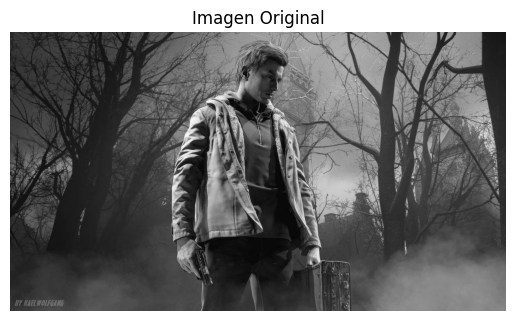

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
show_download_img(original,'original' ,'Imagen Original')

# Segmentación binaria - umbral fijo

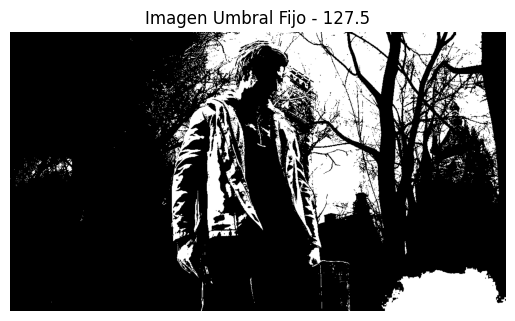

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# Umbral fijo
umbral_value, thresh_fixed = cv2.threshold(original, 127.5, 255, cv2.THRESH_BINARY)
show_download_img(thresh_fixed,'umbralFijo', 'Imagen Umbral Fijo - 127.5')

# Segmentación binaria - umbral adaptativo

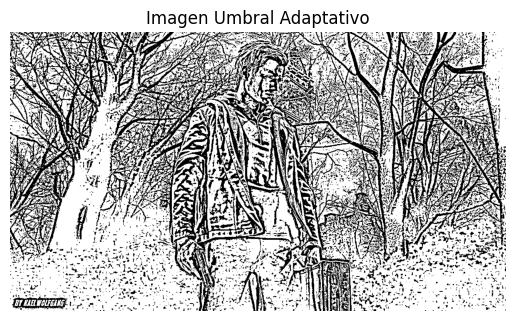

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
#Umbral adaptativo
thresh_adaptive = cv2.adaptiveThreshold(original, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)


show_download_img(thresh_adaptive,'umbralAdaptativo', 'Imagen Umbral Adaptativo')

# Detección de contornos

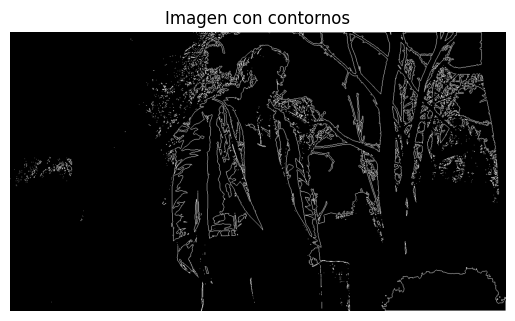

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:

# Binarizar con umbral fijo
umbral_value, thresh_fixed = cv2.threshold(original, 127.5, 255, cv2.THRESH_BINARY)

# Detectar contornos
contornos_det, jerarquia  = cv2.findContours(thresh_fixed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#nota: jerarquia --> Valor que me devuelve la función pero no me interesa

# Crear imagen en negro del mismo tamaño
contornos = np.zeros_like(original)

# Dibujar solo los contornos en blanco
cv2.drawContours(contornos, contornos_det, -1, (255), 1)
show_download_img(contornos,'contornos' ,'Imagen con contornos')

# Centro de masa y bounding boxes

In [8]:
#Definición de fotos a dibujar:
contornos_img = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
centros_img = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
bounding_boxes_img = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
todo_junto_img = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)



contours_fixed, junk = cv2.findContours(thresh_fixed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

areas = [] #Areas detectadas de la imagne
perimeters = [] #Perimetros detectados de la imagne


for i in contours_fixed:

  if cv2.contourArea(i) > 50:  # ignorar ruido pequeño

    # Dibujar Contorno
    cv2.drawContours(contornos_img, [i], -1, (0,255,0), 2)
    cv2.drawContours(todo_junto_img, [i], -1, (0,255,0), 2)

    # Dibujar Centro de masa
    M = cv2.moments(i)

    #Si el área del contorno es diferente de cero
    if M["m00"] != 0:

       # Calcular las coordenadas del centro de masa (cx, cy)
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])


        # Dibujar un círculo rojo (255,0,0) en el centro de masa en 'todo_junto_img'
        cv2.circle(centros_img, (cx, cy), 5, (255,0,0), -1)

        # Dibujar un círculo rojo (255,0,0) en el centro de masa en 'todo_junto_img'
        cv2.circle(todo_junto_img, (cx, cy), 5, (255,0,0), -1)


    # Dibujar Bounding Box
    # Calcular las coordenadas y dimensiones del rectángulo delimitador (Bounding Box)
    x, y, w, h = cv2.boundingRect(i)

    # Dibujar el rectángulo delimitador en 'bounding_boxes_img'.
    cv2.rectangle(bounding_boxes_img, (x, y), (x+w, y+h), (0,0,255), 2)
    # Dibujar el rectángulo delimitador en 'todo_junto_img'.
    cv2.rectangle(todo_junto_img, (x, y), (x+w, y+h), (0,0,255), 2)



    # Guardar Métricas

    # Calcular y almacenar el área
    areas.append(cv2.contourArea(i))

    # Calcular y almacenar el perímetro
    perimeters.append(cv2.arcLength(i, True))


## Contornos

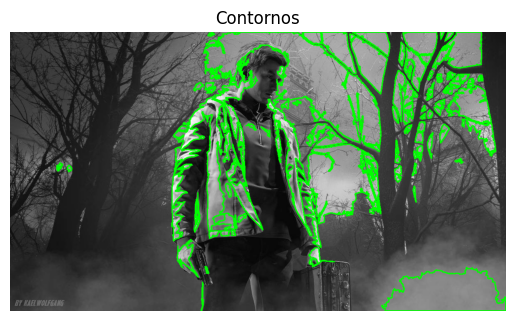

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
show_download_img(contornos_img, 'contornos', 'Contornos')

## Centro de masa

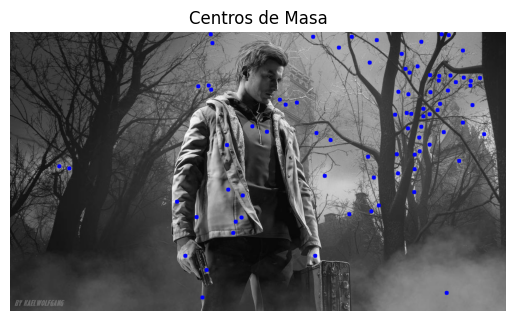

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
show_download_img(centros_img, 'centros_masa', 'Centros de Masa')

## Bounding Boxes

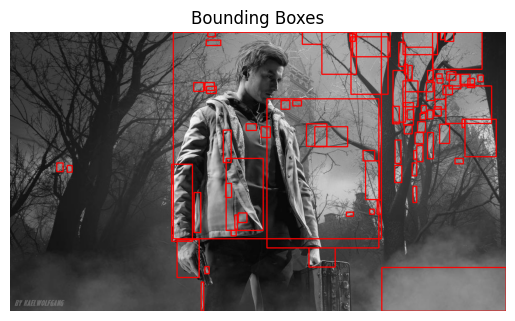

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
show_download_img(bounding_boxes_img, 'bounding_boxes', 'Bounding Boxes')

## Centro de masa y bounding boxes junto

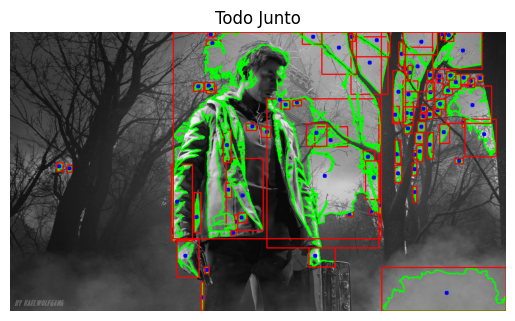

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
show_download_img(todo_junto_img, 'todo_junto', 'Todo Junto')

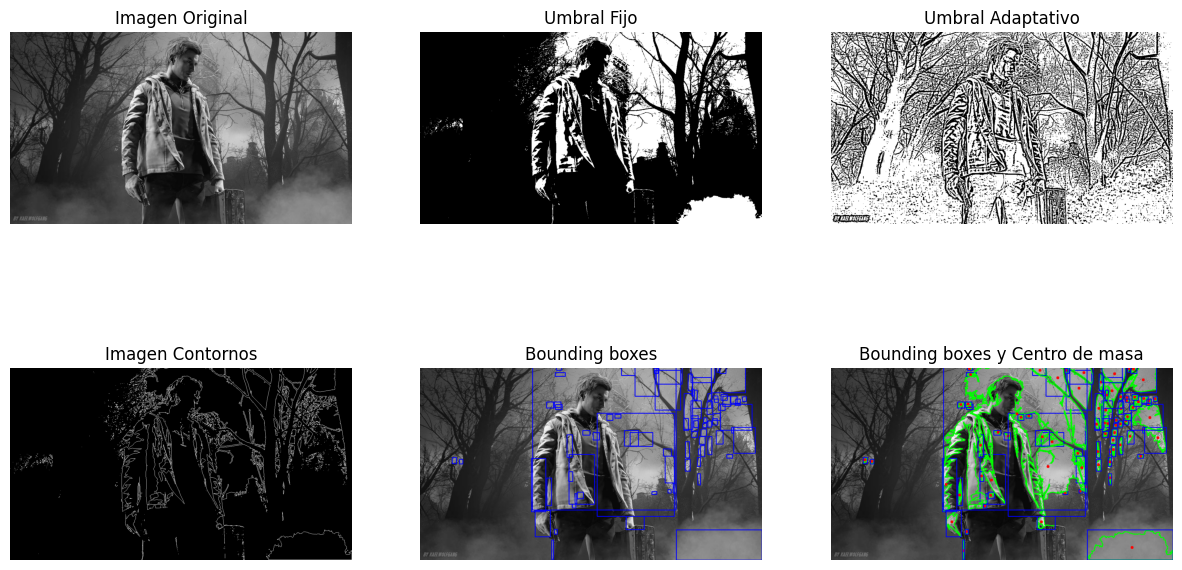

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Mostrar imagen original
# axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convierte BGR a RGB - NO SE PONE porque sino invierte los colores.
axes[0, 0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
#axes[0, 0].imshow(original)  # YA está en RGB
axes[0, 0].set_title("Imagen Original")
axes[0, 0].axis('off')

# Mostrar imagen Umbral Fijo
axes[0, 1].imshow(thresh_fixed, cmap='gray')
axes[0, 1].set_title("Umbral Fijo")
axes[0, 1].axis('off')

# Mostrar imagen umbral adaptativo
axes[0, 2].imshow(thresh_adaptive, cmap='gray')
axes[0, 2].set_title("Umbral Adaptativo")
axes[0, 2].axis('off')

# Mostrar imagen con contornos
axes[1, 0].imshow(contornos, cmap='gray')
axes[1, 0].set_title("Imagen Contornos")
axes[1, 0].axis('off')

# Mostrar bordes usando Bounding boxes
axes[1, 1].imshow(bounding_boxes_img, cmap='gray')
axes[1, 1].set_title("Bounding boxes")
axes[1, 1].axis('off')


# Mostrar bordes usando Bounding boxes, centro de masa
axes[1, 2].imshow(todo_junto_img, cmap='gray')
axes[1, 2].set_title("Bounding boxes y Centro de masa")
axes[1, 2].axis('off')


plt.show()

# Métricas

In [14]:
num_formas = len(areas)
area_promedio = np.mean(areas) if areas else 0
perimetro_promedio = np.mean(perimeters) if perimeters else 0

print(f'Número de formas detectadas: {num_formas}')
print(f'Área promedio: {area_promedio:.2f}')
print(f'Perímetro promedio: {perimetro_promedio:.2f}')

Número de formas detectadas: 82
Área promedio: 2098.43
Perímetro promedio: 327.58
